# Gün 1 bölüm 2: Rekabet eden tehlikelerle basit bir bölmeli modelin gösterimi

<div style="background: #f8f9fa; padding: 0.5rem 1rem; border-radius: 8px; margin-bottom: 1rem; border-left: 4px solid #007bff;">
<a href="../../index.ipynb" style="text-decoration: none; color: #007bff; font-weight: bold;">← Kurs Dizinine Geri Dön</a> | 
<a href="../../index-tr.ipynb" style="text-decoration: none; color: #dc3545; font-weight: bold;">🇹🇷 Türkçe Index</a>
</div>

---

## 1. Rekabet eden tehlikeler

Artık modelimize sahip olduğumuza göre, daha fazla bölme ve rekabet eden tehlikeler durumunu inceleyerek karmaşıklık ekleyebiliriz. Bir sonraki alıştırmada, enfekte bireyler arasında ölüm olasılığını tanımlamak için I'dan çıkan bir ölüm bölmesi eklemek istiyoruz.

Sonraki adımlar için, modellediğimiz hastalık için CFR'nin %30 olduğunu öne süren bilgiler topladığımızı hayal edin. Bu bilgiyi ve gözden geçirdiğimiz kavramları kullanarak yeni bir M bölmesi eklemeyi, bir ölüm oranı mu belirtmeyi ve modeli çalıştırmayı deneyin.

Aşağıdaki betikteki eksik boşlukları doldurmaya çalışın:

here() starts at C:/Users/juano/Dropbox/Code/Git/ankara-modelling-2025-notebooks

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."


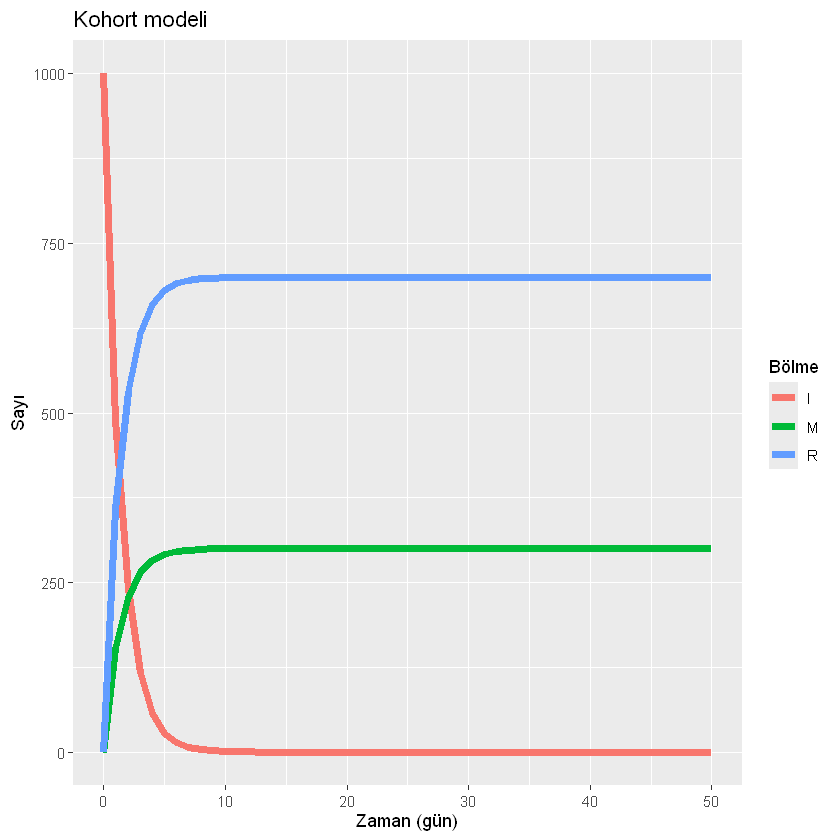

In [1]:
# Bazı yararlı paketleri yükle:
library(deSolve)  # Diferansiyel denklemleri çözmek için 
library(reshape2) # Model çıktımızı düzenlemek için
library(ggplot2)  # Güzel grafikler üretmek için!
library(here)     # Her zaman çalışma dizinimizde olduğumuzdan emin olmak için



## Kohort modelimize ölümlülük ekle 

# Popülasyon büyüklüğü:
N <- 1000

# MODEL GİRDİLERİ:

# Başlangıç koşulları
initial_state_values <- c(
  I = N,
  M = 0,
  R = 0)           

# Günlük parametre değerleri

# %30'luk bir CFR için, mu nedir? 

mu= 0.5*0.3/(1-0.3) # gamma*CFR/(1-CFR)

parameters <- c(gamma = 1/2, mu)

# ZAMAN ADIMLARI:

# Modeli çözeceğimiz zaman adımları dizisini saklayan vektör
times <- seq(from = 0, to = 50, by = 1)   # 0'dan 365 güne kadar günlük aralıklarla

# MODEL FONKSİYONU: 

# Model fonksiyonu giriş argümanları olarak (şu sırayla) alır: zaman, durum ve parametreler
cohort_model2 <- function(time, state, parameters) {  
  
  with(as.list(c(state, parameters)), {     
    
    # Toplam popülasyon büyüklüğü N'i hesaplama (her bölmedeki kişi sayısının toplamı)
    N <- I + R
    
    # Diferansiyel denklemler
    dI <- -(gamma+mu) * I     
    dM <- I*mu
    dR <- gamma * I
    
    return(list(c(dI, dM, dR))) 
  })
  
}

# MODEL ÇIKTISI (diferansiyel denklemleri çözme):

# ode entegrasyon algoritmasını kullanarak diferansiyel denklemleri çözme
output2 <- as.data.frame(ode(y = initial_state_values, 
                             times = times, 
                             func = cohort_model2,
                             parms = parameters))


# çıktı veri setini uzun formata çevir
output2_long <- melt(as.data.frame(output2), id = "time")                 


# Yeni çıktıyı çiz
ggplot(data = output2_long,                                               
       aes(x = time, y = value, colour = variable, group = variable)) +  
  geom_line(size=2) +                                                          
  xlab("Zaman (gün)")+                                                   
  ylab("Sayı") +                                                       
  labs(colour = "Bölme",                                          
       title = "Kohort modeli")    

### 2.1 Simülasyonumuzdan CFR'yi keşfet

Artık ölümlülük eklenmiş modelimiz var, modelden tahmin edilen CFR'nin CFR =%30'a karşılık gelip gelmediğini kontrol etmeyi deneyin

Bunun için, her bölmedeki kişilerin oranını görmek isteyebiliriz

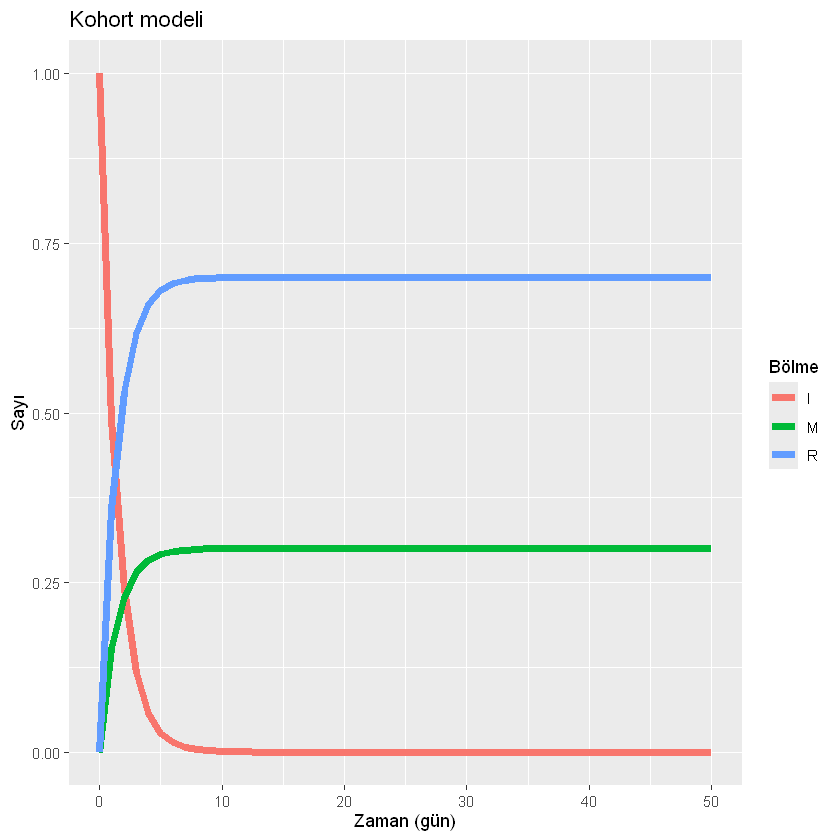

In [2]:


output3_long<- output2_long
output3_long$value<-output2_long$value/N


# S, I ve R bölmelerindeki kişilerin oranını zaman içinde çiz
ggplot(data = output3_long,                                               
       aes(x = time, y = value, colour = variable, group = variable)) +  
  geom_line(size=2) +                                                        
  xlab("Zaman (gün)")+                                                  
  ylab("Sayı") +                                                      
  labs(colour = "Bölme",                                          
       title = "Kohort modeli")  




Grafikten hastalık sonucu ölen kişilerin oranının ne olduğunu söyleyebilir misiniz?

C/ Yaklaşık %33